## **EE769 Introduction to Machine Learning**

### **Assignment 2:-  Classification, Feature Engineering, Deployment**

Name:- Rajat Dhumale

Roll no:- 210260041

Department:- Engineering Physics

Importing Libraries

In [73]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

 1. Regression and out-of-distribution prediction:

 a. Download the wine quality datasets from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

 b. Explore, visualize, and pre-process the data as appropriate.

In [74]:
#Importing dataset from google drive.
whitewine_data = pd.read_csv('/content/drive/MyDrive/winequality-white.csv')

In [75]:
#Exploring dataset
#Analyse the first 10 rows of the dataset
whitewine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [76]:
#Summary of the dataset which shows  mean, std, min, value at 25% , 50%, 75% of dataset and max.
whitewine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [77]:
#Type of data used in dataset
whitewine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


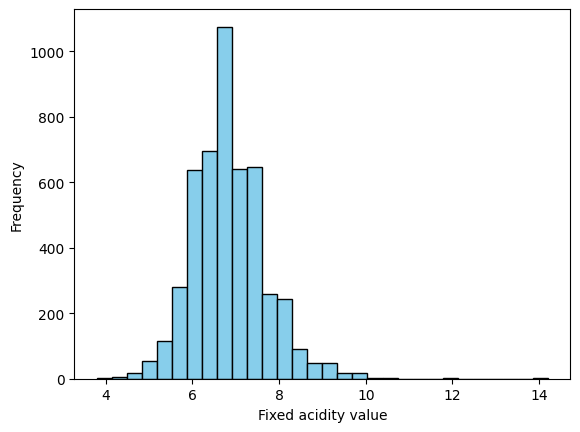

In [78]:
#Visualing dataset
#Plotting histogram for fixed acidity.
plt.hist(whitewine_data["fixed acidity"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fixed acidity value')
plt.ylabel('Frequency')
plt.show()

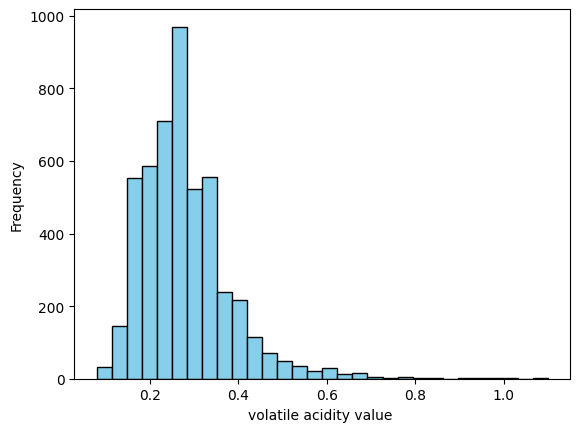

In [79]:
#Plotting histogram for volatile acidity .
plt.hist(whitewine_data["volatile acidity"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('volatile acidity value ')
plt.ylabel('Frequency')
plt.show()

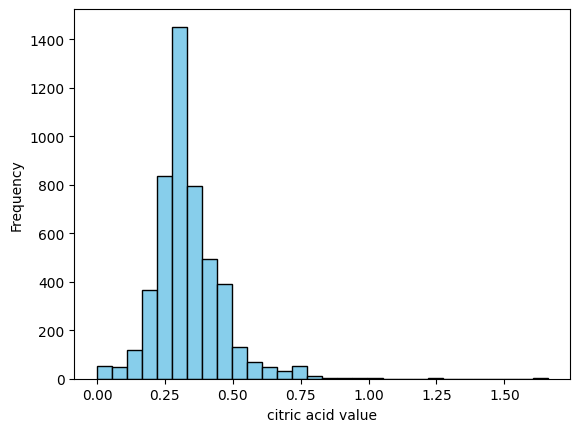

In [80]:
#Plotting histogram for citric acid.
plt.hist(whitewine_data["citric acid"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('citric acid value')
plt.ylabel('Frequency')
plt.show()

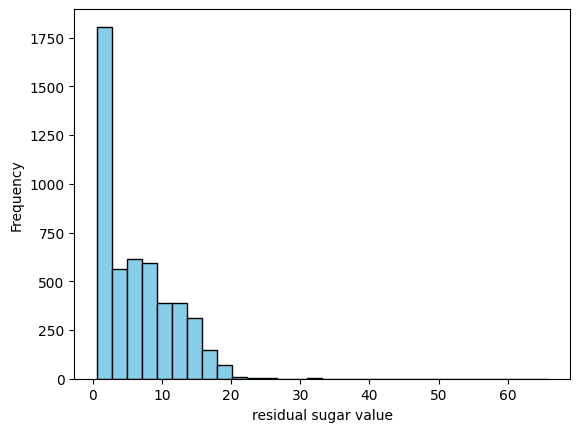

In [81]:
#Plotting histogram for residual sugar.
plt.hist(whitewine_data["residual sugar"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('residual sugar value')
plt.ylabel('Frequency')
plt.show()

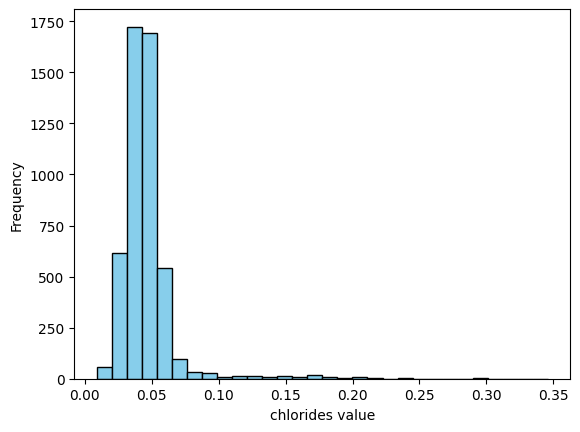

In [82]:
#Plotting histogram for chlorides.
plt.hist(whitewine_data["chlorides"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('chlorides value')
plt.ylabel('Frequency')
plt.show()

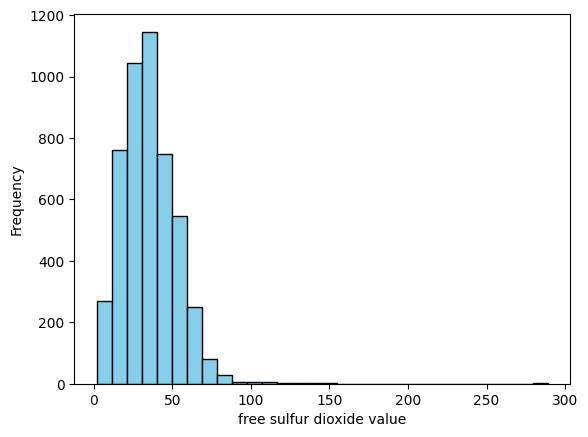

In [83]:
#Plotting histogram for free sulfur dioxide .
plt.hist(whitewine_data["free sulfur dioxide"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('free sulfur dioxide value')
plt.ylabel('Frequency')
plt.show()

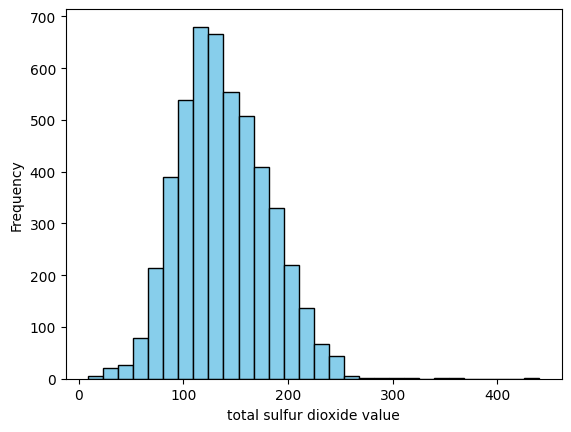

In [84]:
#Plotting histogram for total sulfur dioxide .
plt.hist(whitewine_data["total sulfur dioxide"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('total sulfur dioxide value')
plt.ylabel('Frequency')
plt.show()

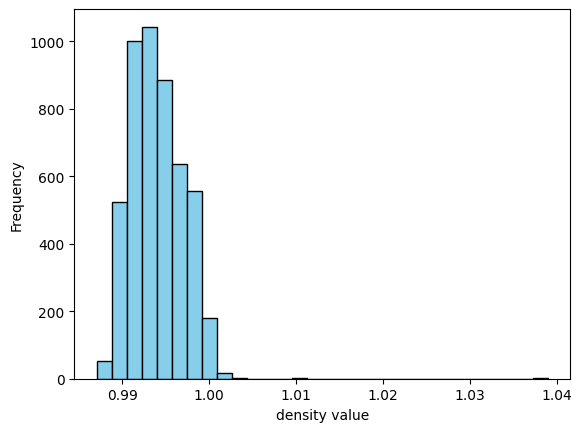

In [85]:
#Plotting histogram for density.
plt.hist(whitewine_data["density"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('density value')
plt.ylabel('Frequency')
plt.show()

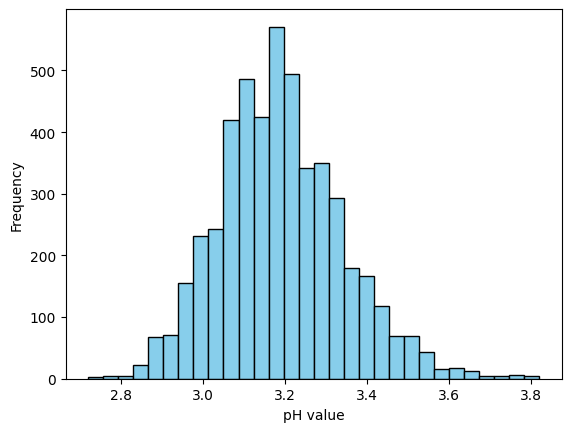

In [86]:
#Plotting histogram for pH.
plt.hist(whitewine_data["pH"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('pH value')
plt.ylabel('Frequency')
plt.show()

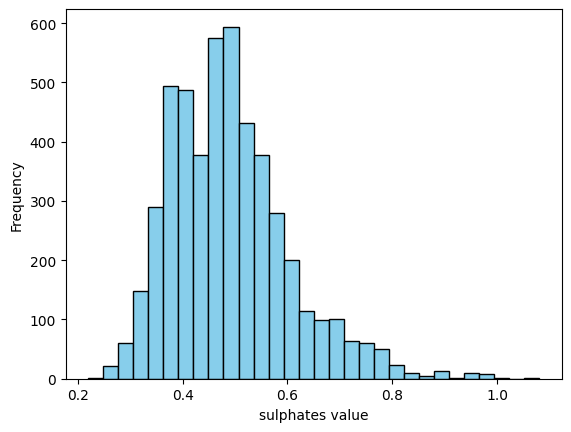

In [87]:
#Plotting histogram for sulphates.
plt.hist(whitewine_data["sulphates"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('sulphates value')
plt.ylabel('Frequency')
plt.show()

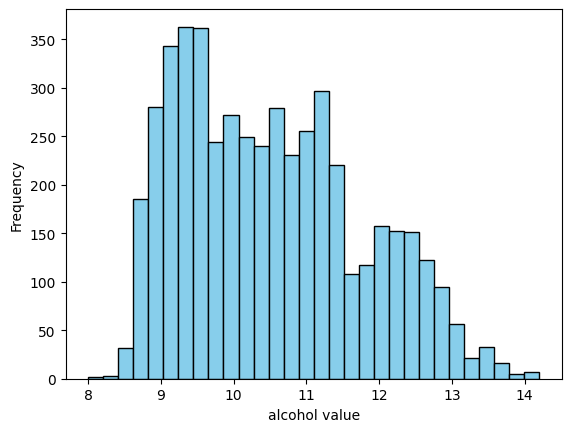

In [88]:
#Plotting histogram for alcohol.
plt.hist(whitewine_data["alcohol"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('alcohol value')
plt.ylabel('Frequency')
plt.show()

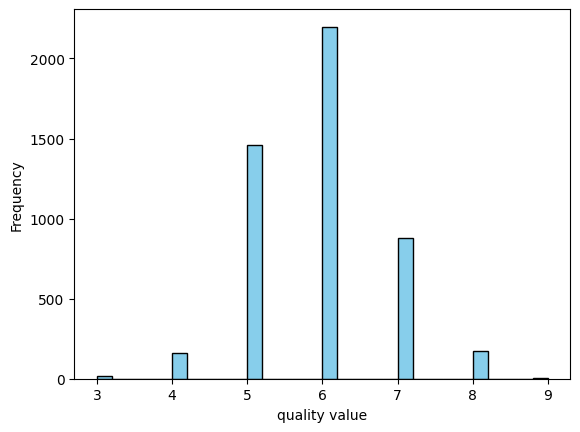

In [89]:
#Plotting histogram for quality.
plt.hist(whitewine_data["quality"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('quality value')
plt.ylabel('Frequency')
plt.show()

In [90]:
#Data Pre-processing
#Handling Missing Values
whitewine_data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
#Checking missing values
whitewine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values found since sum is zero.

 c. Train, validate varying at least one hyperparameter, and test at least two types of models:

 i. Random forest

 ii. Support vector regression with RBF kernel

 iii. Neural network with single hidden layer (output layer should have linear activation)

In [92]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [93]:
#Get Target Variables
y = whitewine_data['quality']

#Get feature variables
X = whitewine_data.drop(['quality'], axis=1)

In [94]:
#Checking dimension of feature variable
X.shape

(4898, 11)

In [95]:
#Analyse features
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [96]:
#Analyse target
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [97]:
#Divide data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#test_size=0.2 divides data in 20:80 test to train ratio of data

In [98]:
#Checking Dimensions of train and test data
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (3918, 11)
X_test : (980, 11)
y_train : (3918,)
y_test : (980,)


In [99]:
#Building Random Forest Model
rf_model = RandomForestClassifier()

In [100]:
#Fitting Training Data
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
#Predicting from test data
y_pred = rf_model.predict(X_test)

In [102]:
#Checking Accuracy
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6785714285714286


Accuracy of Random Forest model is 67.85%.

Learnt impenting Random forest model from https://www.youtube.com/watch?v=s7vsF2bzQX8&t=272s


In [103]:
#Support vector regression with RBF kernel
#Get Target Variables
y1 = whitewine_data['quality']

#Get feature variables
X1 = whitewine_data.drop(['quality'], axis=1)

In [104]:
#Divide data into train and test into test set as 20% and traing data as 80%
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [106]:
#Fitting SVM with RBF Kernel to the Training set
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(X1_train_scaled, y1_train)

SVC()

In [107]:
# Predict on the test set
y1_pred = svm_model.predict(X1_test_scaled)

In [108]:
# Calculate accuracy
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y1_test, y1_pred))

Accuracy:  0.5673469387755102


Accuracy of Model is 56.73%.

Learnt implenting SVM with RBF kernel from https://www.youtube.com/watch?v=dl_ZsuHSIFE&t=493s


 d. Search the net about how to determine the importance of each variable, and find the importance in the final models tried. Comment on whether the same variables are important for different models.

In [109]:
feature_imp = pd.Series(rf_model.feature_importances_, index=whitewine_data.columns[:11])
feature_imp

fixed acidity           0.074983
volatile acidity        0.100891
citric acid             0.081684
residual sugar          0.088831
chlorides               0.085714
free sulfur dioxide     0.093555
total sulfur dioxide    0.091025
density                 0.108129
pH                      0.085975
sulphates               0.079867
alcohol                 0.109347
dtype: float64

 Feature selection efforts by identifying the most relevant features for prediction.  Feature importance can facilitate model comparison and evaluation by providing a standardized metric for assessing model performance.As for whether the same variables are important for both models, we would need to compare the variable importances directly. If certain variables have high importance in both models, they can be considered important in both models. However, the interpretation of variable importance can vary between models, so it's essential to consider the context of each model and the dataset. SVM doent have feature importance.

e. Test the model for red with data from white and vice versa, and comment on whether the model for red wines is applicable to white wines and versa or not.

In [110]:
#Appling Random Forest model of White Wine for Red Wine
#Importing Red Wine dataset
redwine_data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [111]:
#Get Target Variables
y2 = redwine_data['quality']

#Get feature variables
X2 = redwine_data.drop(['quality'], axis=1)

In [112]:
#Divide data into train and test
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
#test_size=0.2 divides data in 20:80 test to train ratio of data

In [113]:
#Building Random Forest Model for red wine data
rf_Model1 = RandomForestClassifier()

In [114]:
#Fitting Training Data
rf_Model1.fit(X2_train, y2_train)

RandomForestClassifier()

In [115]:
#Predicting red wine quality from whitewine model(rf_Model)
y2_pred = rf_model.predict(X2)

In [116]:
#Checking Accuracy
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y2,y2_pred))

Accuracy:  0.36397748592870544


We see that accuracy is 36.39% which is low. Hence model of whitewine cannot be applied for redwine.

In [117]:
#Predicting white wine quality from redwine model(rf_Model)
y3_pred = rf_Model1.predict(X)

In [118]:
#Checking Accuracy
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y,y3_pred))

Accuracy:  0.47019191506737446


We see that accuracy is 47.01% which is low. Hence model of redwine cannot be applied for whitewine.

 2. Classification:

 a. Download the data to predict Down syndrome in mice from
 https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression#
 . The prediction problem is to either predict the genotype (binary) using the gene expression variables from DYRK1A_N to CaNA_N.

 b. Explore, visualize, and pre-process the data as appropriate, including developing a strategy to deal
 with missing variables. You can choose to impute the variable. The recommended way is to use
 multivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html
 )

In [119]:
#Importing dataset from google drive.
data = pd.read_csv('/content/drive/MyDrive/Data_Cortex_Nuclear.csv')

In [120]:
#Exploring dataset
#Analyse the first 10 rows of the dataset
data.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


In [121]:
#Summary of the dataset which shows  mean, std, min, value at 25% , 50%, 75% of dataset and max.
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [122]:
#Type of data used in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

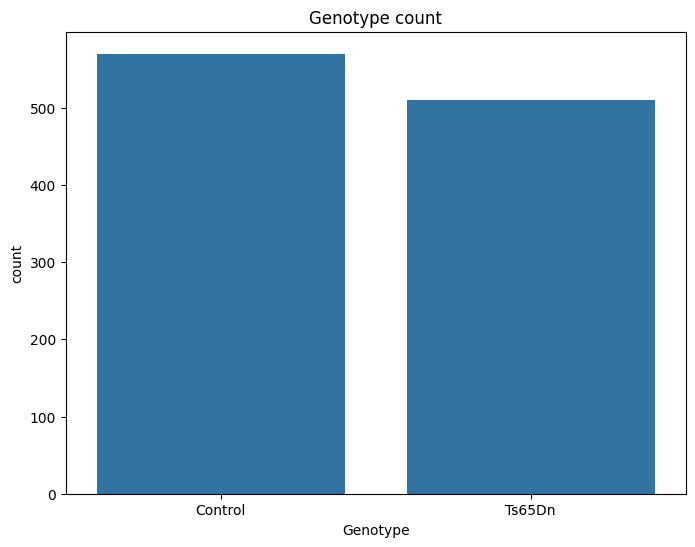

In [123]:
#Visualing dataset
plt.figure(figsize=(8, 6))
sb.countplot(x='Genotype', data=data)
plt.title('Genotype count')
plt.show()

In [124]:
#Data Pre-processing
#Handling Missing Values
data.isnull()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1077,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1078,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
#Checking missing values
data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

There are null or missing values in our dataset. So we need to fill these null value by mean of coreponding row.

In [126]:
#Replacing missing values to zero (Assuming gene variable was zero while taking data)
data.replace(np.nan, 0, inplace=True)

In [127]:
data.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

Missing values are replaced by zero.

c. Train, validate varying at least one hyperparameter, and test at least two types of models:

 i.
 Randomforest

 ii.
 Support vector classification using RBF kernel

 iii.
 Neural network with single hidden layer (output layer should be have softmax activation)


In [128]:
#Random Forest
to_ignore = ['MouseID']
class_labels = ['Genotype','Treatment','Behavior','class']

# Target variables
y = data['Genotype']

# the data frame which consists soley of the protein expression levels
X = data.drop(class_labels+to_ignore, axis=1)

In [129]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()

In [131]:
rf_Model.fit(X_train, y_train)

RandomForestClassifier()

In [132]:
#Predicting from test data
y_pred = rf_Model.predict(X_test)

In [133]:
#Checking Accuracy
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9953703703703703


Accuracy of our Random Forest model is 99.53%.

In [134]:
#Support vector classification using RBF kernel
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
#Fitting SVM with RBF Kernel to the Training set
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVC()

In [136]:
# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

In [137]:
# Calculate accuracy
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


Accuray of SVM model with rbf kernel is 100%.

 d. See if removing some features systematically will improve your models using recursive feature elimination https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html.

In [ ]:
#For Random Forest
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=rf_Model, cv=5)
selector.fit(X, y)

In [ ]:
print(selector.support_)
print(selector.ranking_)

3. Practice using pre-trained neural networks to extract domain-specific features for new tasks.


a. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore “finetuning the ConvNet”. Test this code out to see if it runs properly in your environment after eliminating code blocks that you do not need.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [140]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


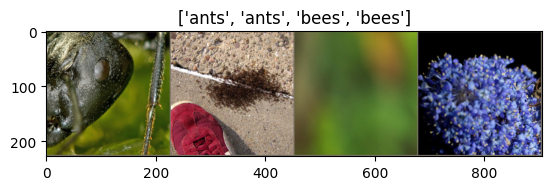

In [153]:
#Visualize a few images
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [144]:
#Training the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [143]:
#Visualing the model prediction
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [154]:
#ConvNet as fixed feature extractor
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]


In [156]:
#Train and evaluate
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.7526 Acc: 0.7131
val Loss: 0.3697 Acc: 0.8431

Epoch 1/24
----------
train Loss: 1.0049 Acc: 0.6189
val Loss: 0.1773 Acc: 0.9608

Epoch 2/24
----------
train Loss: 0.6001 Acc: 0.7500
val Loss: 0.1587 Acc: 0.9673

Epoch 3/24
----------
train Loss: 0.3967 Acc: 0.8402
val Loss: 0.1563 Acc: 0.9673

Epoch 4/24
----------
train Loss: 0.3267 Acc: 0.8730
val Loss: 0.4790 Acc: 0.8301

Epoch 5/24
----------
train Loss: 0.4448 Acc: 0.8156
val Loss: 0.1870 Acc: 0.9608

Epoch 6/24
----------
train Loss: 0.4705 Acc: 0.8115
val Loss: 0.2100 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.3330 Acc: 0.8607
val Loss: 0.2458 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.2975 Acc: 0.8770
val Loss: 0.2193 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.3787 Acc: 0.8402
val Loss: 0.1899 Acc: 0.9608

Epoch 10/24
----------
train Loss: 0.4003 Acc: 0.8320
val Loss: 0.1917 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.3582 Acc: 0.8156
val Loss: 0.2255 Acc: 0.9412

Ep

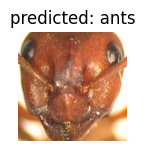

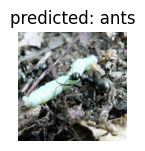

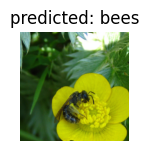

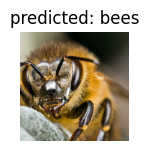

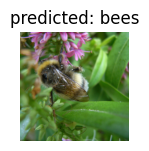

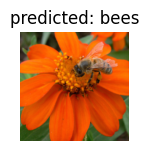

In [157]:
visualize_model(model_conv)

plt.ioff()
plt.show()

 b. Write a function that outputs ResNet18 features for a given input image. Extract features for training images (in image_datasets['train']). You should get an Nx512 dimensional array.

In [201]:
def extract_resnet18_features(image):
    # Load pre-trained ResNet18 model
    resnet = models.resnet18(pretrained=True)
    # Remove the last fully connected layer
    resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    resnet.eval()  # Evaluation mode

    # Define transformations for the input image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Apply transformations to the input image
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Extract features using ResNet18
    with torch.no_grad():
        features = resnet(image)

    return features.squeeze().numpy()

In [176]:
# Example
base_path = "/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/train/ants"
image_filename = "Ant_1.jpg"
image = os.path.join(base_path, image_filename)
features = extract_resnet18_features(image)
print(features.shape)

(512,)


Took help of ChatGPT.

c. Compare RBF kernel SVM(dogrid search onkernel width and regularization) and random forest (do grid search on max depth and number of trees). Test the final model on test data and show the results-- accuracy and F1 score.

In [202]:
#Random Forest
# Load the dataset
train_dataset = ImageFolder("/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/train", transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)

In [203]:
# Extract ResNet18 features for training images
X_train = []
y_train = []
for images, labels in train_loader:
    features = extract_resnet18_features(transforms.ToPILImage()(images[0]))
    X_train.append(features)
    y_train.append(labels.item())

X_train = np.array(X_train)
y_train = np.array(y_train)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [204]:
# Grid search parameters for Random Forest
param_grid_rf = {'max_depth': [10, 20, 30, None],
                 'n_estimators': [10, 50, 100, 200]}

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [207]:
# Test data
test_dataset = ImageFolder("/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/train", transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

X0_test = []
y0_test = []
for images, labels in test_loader:
    features = extract_resnet18_features(transforms.ToPILImage()(images[0]))
    X0_test.append(features)
    y0_test.append(labels.item())

X0_test = np.array(X_test)
y0_test = np.array(y_test)

In [212]:
# Evaluate models
rf_predictions = rf.predict(X0_test)
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y0_test, rf_predictions))
print('F1 Score: ', metrics.f1_score(y0_test, rf_predictions))

Accuracy:  0.943776233365518
F1 Score:  0.943913327668196


In [211]:
#SVM with RBF Kernel
# Grid search parameters for SVM
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1]}

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Evaluate models
svm_predictions = svm.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y0_test, svm_predictions))
print('F1 Score: ', metrics.f1_score(y0_test, svm_predictions))

Accuracy:  0.9959016393442623
F1 Score:  0.9958847736625513


4. Deploy one model from part 1 on a local webserver with a web frontend (e.g. using streamlit). Add some GUI elements, such as sliders for acidity, citrus etc. Most of this should be in the video demo.

In [213]:
#Saving the trained model
import pickle
filename = 'trained_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

#Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [214]:
input_data = (7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8)

#Changing input data as numy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
   print('The quality of wine is 0')
elif(prediction[0]==1):
   print('The quality of wine is 1')
elif(prediction[0]==2):
   print('The quality of wine is 2')
elif(prediction[0]==3):
   print('The quality of wine is 3')
elif(prediction[0]==4):
   print('The quality of wine is 4')
elif(prediction[0]==5):
   print('The quality of wine is 5')
elif(prediction[0]==6):
   print('The quality of wine is 6')
elif(prediction[0]==7):
   print('The quality of wine is 7')
elif(prediction[0]==8):
   print('The quality of wine is 8')
elif(prediction[0]==9):
   print('The quality of wine is 9')
elif(prediction[0]==10):
   print('The quality of wine is 10')

[6]
The quality of wine is 6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
